# Activity: Run simple linear regression

## **Introduction**


As a fundamental practice, simple linear regression is a way to model the relationship between two variables (predictor & target). By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, being part of an analytics team that provides insights about company's sales and marketing practices, one has been assigned to a project that focuses on the use of influencer marketing. Whereby, the relationship between the radio promotion budget and sales will be explored for this task. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [1]:
# Import relevant Python libraries and modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. 

In [2]:
# IMPORT YOUR DATA.
campaign_data = pd.read_csv("marketing_sales_data.csv")

## **Step 2: Data exploration** 


Display the first few rows of the data to get a sense of what it includes.

In [3]:
# Display first 10 rows of the data.
campaign_data.head(10)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


**Question:** What is observed about the different variables included in the data?
- There are 2 continuous variables corresponding to the radio & social media budgets and 2 categorical variables corresponding to level of investment on TV campaigns & influencer type respectively.

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [4]:
# Display number of rows, number of columns.
campaign_data.shape


(572, 5)

**Question:** How many rows and columns exist in the data?
- There are 572 rows & 5 columns.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables.

In [4]:
# Identify rows with missing values 
campaign_data.isna().any().sum()


3

**Question:** How many rows containing missing values?
- There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

Following up, drop the rows that contain missing values to make the data more usable for analysis and regression. Then, check to make sure that there is no missing out on any of the rows.

In [3]:
# Drop the missing data
campaign_data.dropna(axis=0, inplace=True)


In [4]:
# Validate the data cleaning result
campaign_data.isna().any(axis=1).sum()


0

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section.

Create a plot of pairwise relationships of the data to help  visualize the relationships and check model assumptions. 

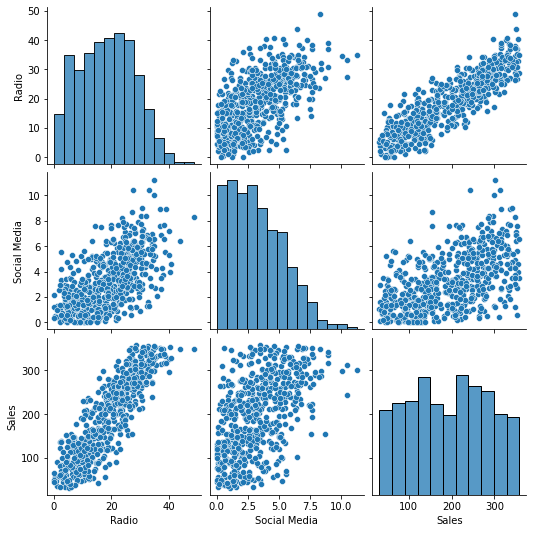

In [6]:
# Create plot of pairwise relationships.
fig = sns.pairplot(data=campaign_data)


**Question:** Is the assumption of linearity met?

- From the scatterplot matrix, positive association is observed btw `Radio` & `Sales` variable with the points cluster around an underlying linear pattern.

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [5]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.
ols_data = campaign_data[['Radio', 'Sales']]


Now, display the first 10 rows of the new DataFrame to better understand the data.

In [8]:
# Display first 10 rows of the new DataFrame.
ols_data.head(10)


,Radio,Sales
0,1.218354,90.054222
1,14.949791,222.741668
2,10.377258,102.774790
3,26.469274,328.239378
4,36.876302,351.807328
5,25.561910,261.966812
6,37.263819,349.861575
7,13.187256,140.415286
8,29.520170,264.592233
9,3.773287,55.674214


Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [6]:
# Write the linear regression formula.
ols_formula = "Sales ~ Radio"


Now, create a linear regression model for the data and fit the model to the data.

In [7]:
from statsmodels.formula.api import ols

# Implement OLS & fit the model to the data.
OLS = ols(formula=ols_formula, data=ols_data)
model = OLS.fit()

## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [10]:
# Get summary of results.
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.07e-176
Time:                        11:10:54   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model.params

Intercept    41.532601
Radio         8.173281
dtype: float64

Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What does the linear equation express about the relationship between sales and radio promotion budget? 
- sales = 8.1733 * radio promotion budget + 41.5326

**Question:** What does the slope mean in this context?
- One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
- Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.

Now that the linear regression model is built and fitted to the data, proceed with remaining model assumptions check. This will help confirm all the findings. First, plot the OLS data with the best fit regression line.

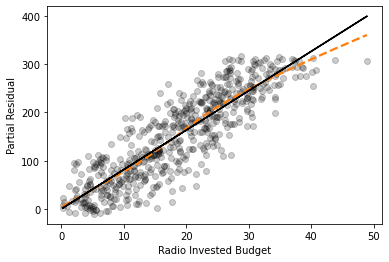

In [23]:
# Plot the OLS data with the best fit regression line.
sns.regplot(x=ols_data.Radio, y=model.resid + ols_data.Radio * model.params[1], 
            scatter_kws={'alpha': 0.2, 'color': 'k'},
            line_kws={'color': 'C1', 'ls': '--'}, lowess=True)
plt.plot(ols_data.Radio, ols_data.Radio * model.params[1], 'k-')
plt.xlabel('Radio Invested Budget'); plt.ylabel('Partial Residual')
plt.show()

**Question:** What is observed from the preceding regression plot?
- The simple linear term well explains the relationship btw radio promotion budget & sales.

Now, check the normality assumption. Get the residuals from the model.

In [10]:
# Get the residuals from the model.
residuals = model.resid


Now, visualize the distribution of the residuals.

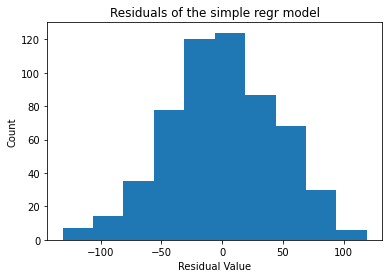

In [24]:
# Visualize the distribution of the residuals.
ax = residuals.plot(kind='hist', bins=10)
ax.set(title='Residuals of the simple regr model',
       xlabel='Residual Value',
       ylabel='Count')
plt.show()


**Question:** Based on the visualization, what can be observed about the distribution of the residuals?
- The distribution has decidedly longer tails than normal distribution and exhibits mild skewness toward lower values.

Next, create a Q-Q plot to confirm the assumption of normality.

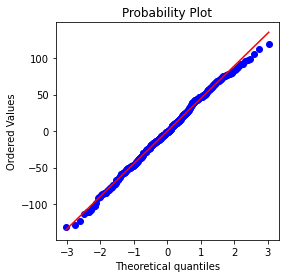

In [23]:
# Create a Q-Q plot.
from scipy import stats

qq_fig, qq_ax = plt.subplots(figsize=(4, 4))
stats.probplot(residuals, plot=qq_ax)
plt.show()

**Question:** Is the assumption of normality met?
- As shown, the QQ-plot is align with the nature of histogram, where the residuals are mostly normally distributed, except at one end of the distribution.   

Now, check the assumptions of independent observation and homoscedasticity. Start by getting the fitted values from the model.

In [10]:
# Get fitted values.
fitted_values = model.fittedvalues

Next, create a scatterplot of the residuals against the fitted values.

In [8]:
import statsmodels.api as sm

def regplot_lowess_ci(x, y, ci=95, n_boot=1000, **kwargs):
    x_ = x.to_numpy()
    y_ = y.to_numpy()
    x_grid = np.linspace(start=x_.min(), stop=x_.max(), num=1000)
    
    def reg_func(_x, _y):
        return sm.nonparametric.lowess(exog=_x, endog=_y, xvals=x_grid)

    beta_boots = sns.algorithms.bootstrap(
        x_, y_,
        func=reg_func,
        n_boot=n_boot,
    )
    err_bands = sns.utils.ci(beta_boots, ci, axis=0)
    y_plt = reg_func(x_, y_)
    
    ax = sns.lineplot(x=x_grid, y=y_plt, color='black', **kwargs)
    sns.scatterplot(x=x_, y=y_, ax=ax, **kwargs)
    ax.fill_between(x_grid, *err_bands, alpha=.3, **kwargs)
    
    return ax, err_bands


C:\Users\cloud\AppData\Local\Temp/ipykernel_11356/3465880613.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.figure.show()


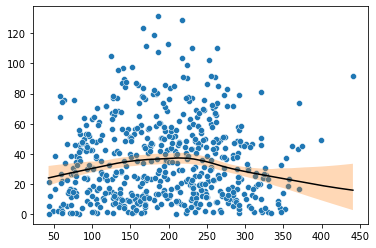

In [11]:
ax, err_bands = regplot_lowess_ci(fitted_values, np.abs(model.resid), n_boot=100)
ax.figure.show()

**Question:** Are the assumptions of independent observation and homoscedasticity met?
- Since there is no noticeable regular pattern in the plot and the variance of the residuals is almost constant across the model, the data is believed to be independent & identically distributed. 

## **Considerations**

**What are some key takeaways that you learned during this lab?**
- For formal inference to be fully valid, the residuals of a model are assumed to be normally distributed, have the same variance, and be independent.      

**How would you present your findings from this lab to others?**

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 
    One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
    Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.


The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope. 


**What summary would you provide to stakeholders?**
- From the explored radio promotion budget & sales, there is a notable relationship btw the two as well explained by the simple linear regression model. 
For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. 

This shows a promising return of investment from the radio, and it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.  